In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [2]:
orders = pd.read_csv("orders.csv")
orders.head()

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name
0,1,2508,450,18-02-2023,842.97,New Foods Chinese
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian


In [3]:
users = pd.read_json("users.json")
users.head()

,user_id,name,city,membership
0,1,User_1,Chennai,Regular
1,2,User_2,Pune,Gold
2,3,User_3,Bangalore,Gold
3,4,User_4,Bangalore,Regular
4,5,User_5,Pune,Gold


In [4]:
conn = sqlite3.connect(":memory:")

with open("restaurants.sql", "r") as file:
    sql_script = file.read()

conn.executescript(sql_script)

restaurants = pd.read_sql_query("SELECT * FROM restaurants;", conn)
restaurants.head()

,restaurant_id,restaurant_name,cuisine,rating
0,1,Restaurant_1,Chinese,4.8
1,2,Restaurant_2,Indian,4.1
2,3,Restaurant_3,Mexican,4.3
3,4,Restaurant_4,Chinese,4.1
4,5,Restaurant_5,Chinese,4.8


## Data Integration

In this section, we combine transactional, user, and restaurant datasets using left joins.


In [5]:
merged_file = pd.merge(
    orders,
    users,
    on="user_id",
    how="left"
)

merged_file.head()

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name,name,city,membership
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,User_2508,Hyderabad,Regular
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular


In [6]:
dataset = pd.merge(
    merged_file,
    restaurants,
    on="restaurant_id",
    how="left"
)
dataset.head()

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,name,city,membership,restaurant_name_y,cuisine,rating
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.2
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Restaurant_309,Indian,4.5
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular,Restaurant_293,Italian,3.0


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_id           10000 non-null  int64  
 1   user_id            10000 non-null  int64  
 2   restaurant_id      10000 non-null  int64  
 3   order_date         10000 non-null  object 
 4   total_amount       10000 non-null  float64
 5   restaurant_name_x  10000 non-null  object 
 6   name               10000 non-null  object 
 7   city               10000 non-null  object 
 8   membership         10000 non-null  object 
 9   restaurant_name_y  10000 non-null  object 
 10  cuisine            10000 non-null  object 
 11  rating             10000 non-null  float64
dtypes: float64(2), int64(3), object(7)
memory usage: 937.6+ KB


## Data Cleaning

- Converted order_date to datetime
- Removed duplicate restaurant columns
- Verified null values

In [8]:
dataset = dataset.rename(columns={
    "restaurant_name_y": "restaurant_name"
})

dataset = dataset.drop(columns=["restaurant_name_x"])

dataset.head()

,order_id,user_id,restaurant_id,order_date,total_amount,name,city,membership,restaurant_name,cuisine,rating
0,1,2508,450,18-02-2023,842.97,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.2
1,2,2693,309,18-01-2023,546.68,User_2693,Pune,Regular,Restaurant_309,Indian,4.5
2,3,2084,107,15-07-2023,163.93,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0
3,4,319,224,04-10-2023,1155.97,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8
4,5,1064,293,25-12-2023,1321.91,User_1064,Pune,Regular,Restaurant_293,Italian,3.0


In [9]:
dataset["order_date"] = pd.to_datetime(dataset["order_date"], dayfirst=True)

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   order_id         10000 non-null  int64         
 1   user_id          10000 non-null  int64         
 2   restaurant_id    10000 non-null  int64         
 3   order_date       10000 non-null  datetime64[ns]
 4   total_amount     10000 non-null  float64       
 5   name             10000 non-null  object        
 6   city             10000 non-null  object        
 7   membership       10000 non-null  object        
 8   restaurant_name  10000 non-null  object        
 9   cuisine          10000 non-null  object        
 10  rating           10000 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 859.5+ KB


In [10]:
dataset.to_csv("final_food_delivery_dataset.csv", index=False)

## 1. Order Trends Over Time

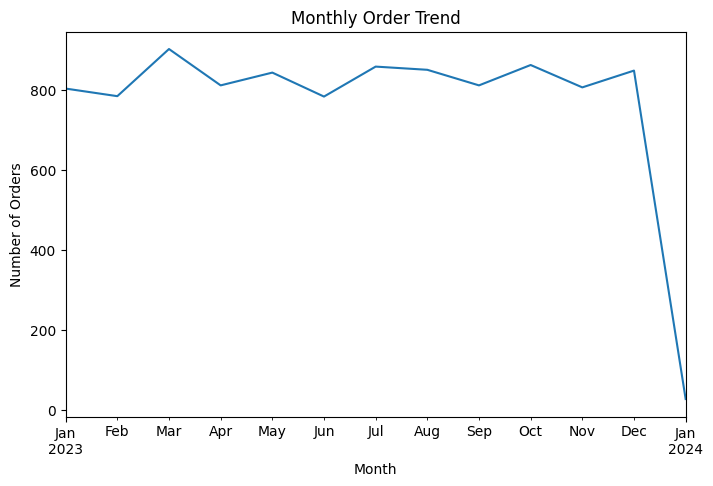

In [11]:
monthly_orders = dataset.groupby(
    dataset["order_date"].dt.to_period("M")
).size()

monthly_orders.plot(kind="line", figsize=(8,5))
plt.title("Monthly Order Trend")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.show()

## 2. User Behavior Patterns

In [12]:
orders_per_user = dataset.groupby("user_id").size()

print("Average orders per user:", round(orders_per_user.mean(),2))

print("\nTop 5 High Value Users:")
print(dataset.groupby("user_id")["total_amount"].sum().sort_values(ascending=False).head())


Average orders per user: 3.47

Top 5 High Value Users:
user_id
1515    11556.49
650     10747.44
496      9634.30
2586     9486.61
2615     9237.32
Name: total_amount, dtype: float64


## 3. City-wise and cuisine-wise performance

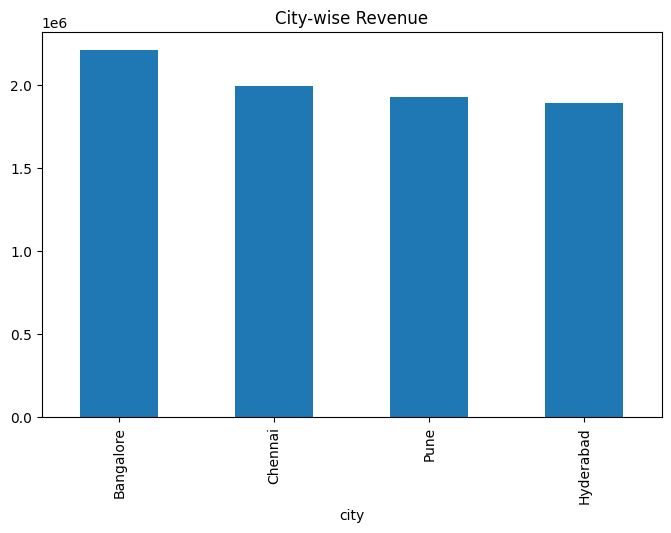

In [13]:
city_revenue = dataset.groupby("city")["total_amount"].sum().sort_values(ascending=False)

city_revenue.plot(kind="bar", figsize=(8,5))
plt.title("City-wise Revenue")
plt.show()

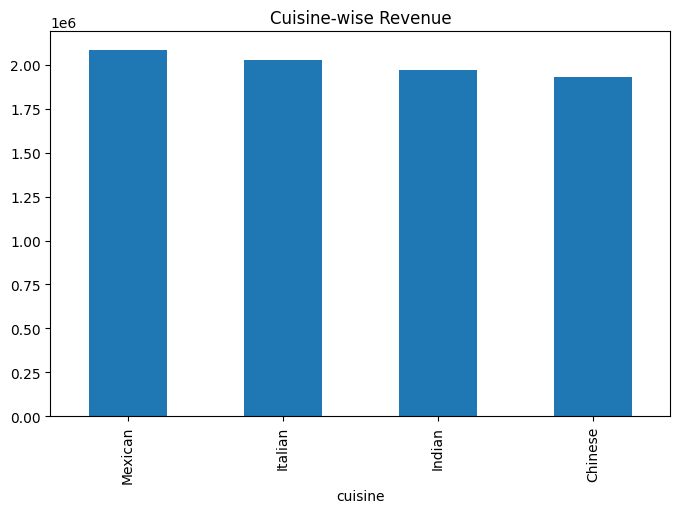

In [14]:
cuisine_revenue = dataset.groupby("cuisine")["total_amount"].sum().sort_values(ascending=False)

cuisine_revenue.plot(kind="bar", figsize=(8,5))
plt.title("Cuisine-wise Revenue")
plt.show()

## 4. Membership Impact Analysis

In [15]:
membership_analysis = dataset.groupby("membership")["total_amount"].agg(["count","mean","sum"])
membership_analysis

,count,mean,sum
membership,,,
Gold,4987,797.145556,3975364.89
Regular,5013,805.158434,4036259.23


## 5. Revenue Distribution & Seasonality

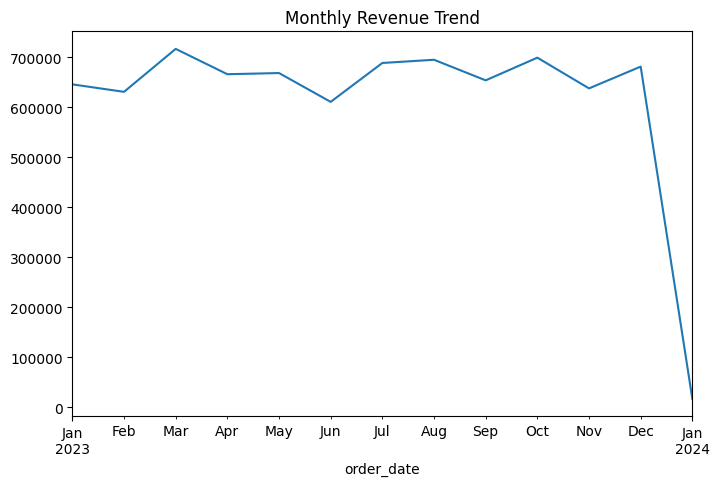

In [16]:
monthly_revenue = dataset.groupby(
    dataset["order_date"].dt.to_period("M")
)["total_amount"].sum()

monthly_revenue.plot(kind="line", figsize=(8,5))
plt.title("Monthly Revenue Trend")
plt.show()


In [17]:
gold_avg = membership_analysis.loc["Gold","mean"]
regular_avg = membership_analysis.loc["Regular","mean"]

difference = round(regular_avg - gold_avg, 2)

print(f"Regular members spend ₹{difference} more per order on average than Gold members.")


Regular members spend ₹8.01 more per order on average than Gold members.


## City-wise Total Revenue Analysis

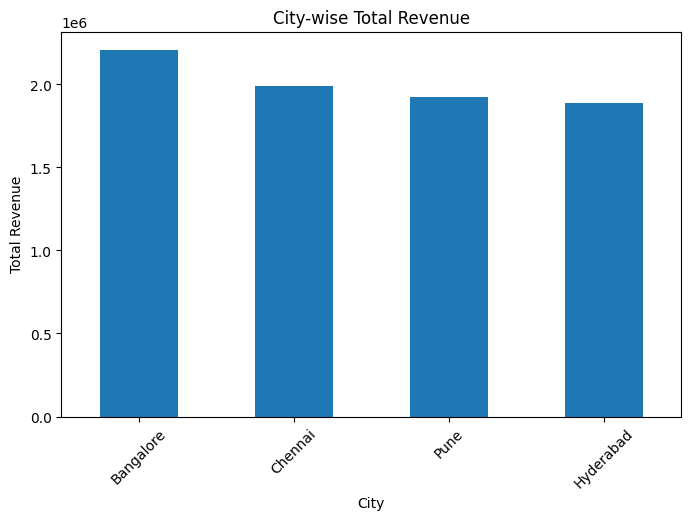

In [18]:
city_revenue.plot(kind="bar", figsize=(8,5))
plt.title("City-wise Total Revenue")
plt.xlabel("City")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()


## Cuisine-wise Total Revenue Analysis

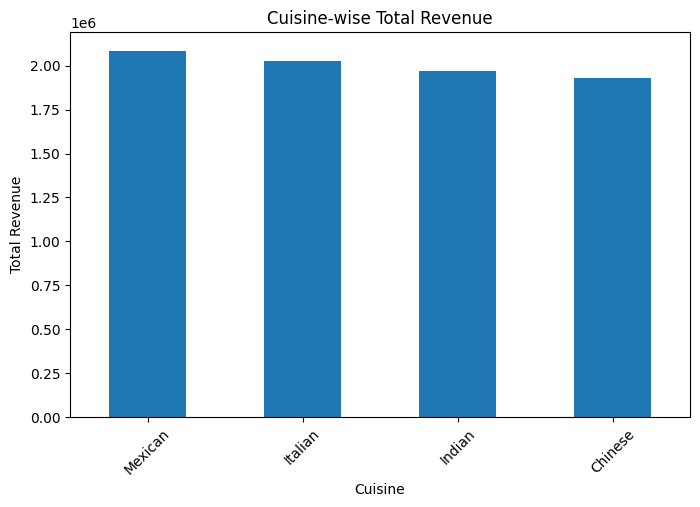

In [19]:
cuisine_revenue.plot(kind="bar", figsize=(8,5))
plt.title("Cuisine-wise Total Revenue")
plt.xlabel("Cuisine")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()


## City-wise Average Order Volume

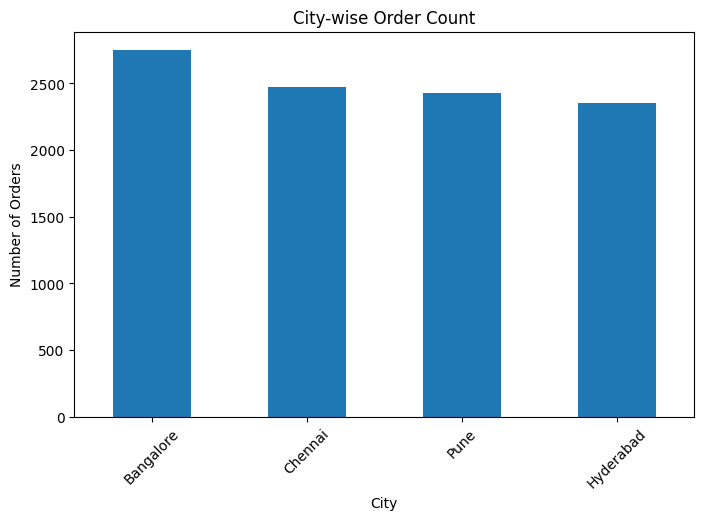

In [20]:
city_avg_orders = dataset.groupby("city").size().sort_values(ascending=False)
city_avg_orders.plot(kind="bar", figsize=(8,5))
plt.title("City-wise Order Count")
plt.xlabel("City")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.show()


## Cuisine-wise Average Order Volume

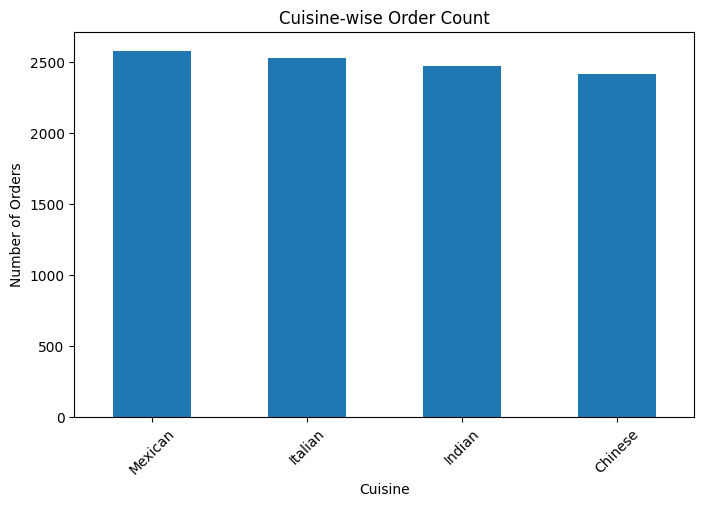

In [21]:
cuisine_avg_orders = dataset.groupby("cuisine").size().sort_values(ascending=False)

cuisine_avg_orders.plot(kind="bar", figsize=(8,5))
plt.title("Cuisine-wise Order Count")
plt.xlabel("Cuisine")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.show()


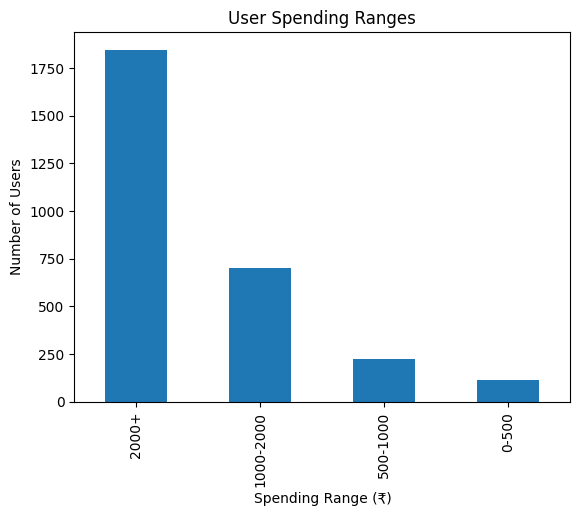

In [22]:
user_total_spend = dataset.groupby("user_id")["total_amount"].sum()

user_total_spend.head()
bins = [0, 500, 1000, 2000, user_total_spend.max()]
labels = ["0-500", "500-1000", "1000-2000", "2000+"]

user_ranges = pd.cut(user_total_spend, bins=bins, labels=labels)

user_ranges.value_counts().plot(kind="bar")
plt.title("User Spending Ranges")
plt.xlabel("Spending Range (₹)")
plt.ylabel("Number of Users")
plt.show()



C:\Users\Jyothi\AppData\Local\Temp\ipykernel_15300\994873496.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_revenue = dataset.groupby("rating_range")["total_amount"].sum()


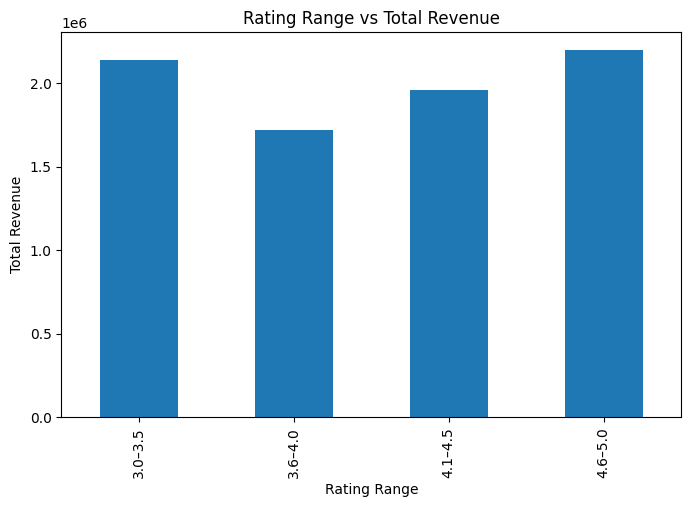

In [23]:
bins = [3.0, 3.5, 4.0, 4.5, 5.0]
labels = ["3.0–3.5", "3.6–4.0", "4.1–4.5", "4.6–5.0"]
dataset["rating_range"] = pd.cut(
    dataset["rating"],
    bins=bins,
    labels=labels,
    include_lowest=True
)

rating_revenue = dataset.groupby("rating_range")["total_amount"].sum()

rating_revenue
rating_revenue.plot(kind="bar", figsize=(8,5))
plt.title("Rating Range vs Total Revenue")
plt.xlabel("Rating Range")
plt.ylabel("Total Revenue")
plt.show()


In [24]:
highest_range = rating_revenue.idxmax()
print("Highest Revenue Rating Range:", highest_range)

Highest Revenue Rating Range: 4.6–5.0


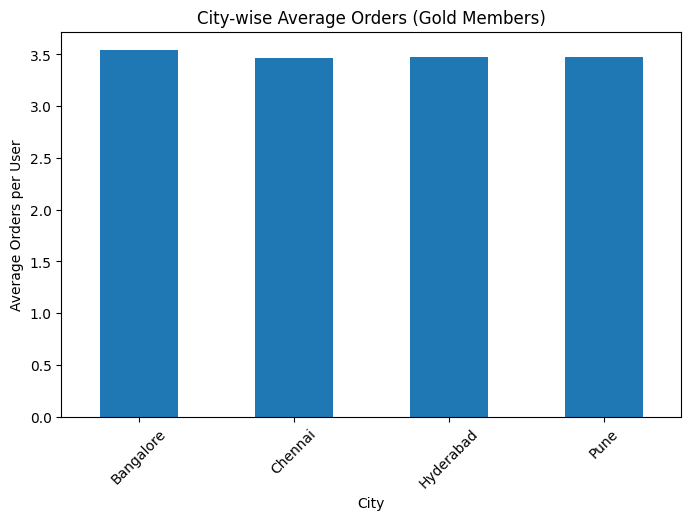

In [25]:
gold_data = dataset[dataset["membership"] == "Gold"]
gold_orders = gold_data.groupby(["city", "user_id"]).size().reset_index(name="order_count")
gold_city_avg = gold_orders.groupby("city")["order_count"].mean()

gold_city_avg.plot(kind="bar", figsize=(8,5))
plt.title("City-wise Average Orders (Gold Members)")
plt.xlabel("City")
plt.ylabel("Average Orders per User")
plt.xticks(rotation=45)
plt.show()


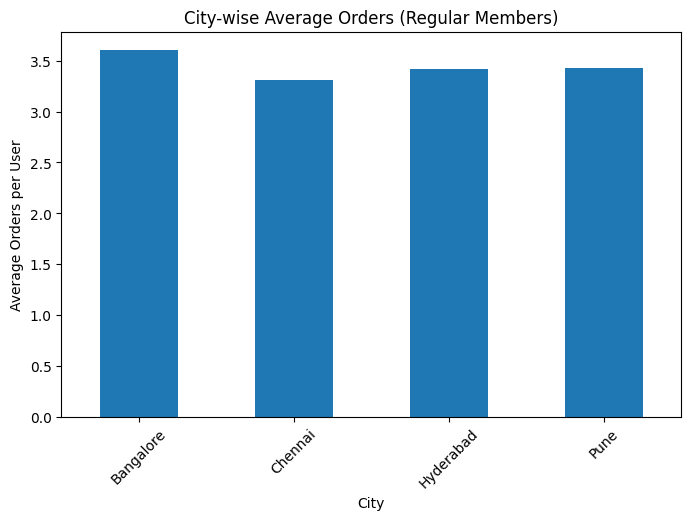

In [26]:
regular_data = dataset[dataset["membership"] == "Regular"]
regular_orders = regular_data.groupby(["city", "user_id"]).size().reset_index(name="order_count")
regular_city_avg = regular_orders.groupby("city")["order_count"].mean()

regular_city_avg.plot(kind="bar", figsize=(8,5))
plt.title("City-wise Average Orders (Regular Members)")
plt.xlabel("City")
plt.ylabel("Average Orders per User")
plt.xticks(rotation=45)
plt.show()


In [27]:
cuisine_restaurant_count = dataset.groupby("cuisine")["restaurant_id"].nunique()
cuisine_revenue = dataset.groupby("cuisine")["total_amount"].sum()

cuisine_analysis = pd.DataFrame({
    "Restaurant_Count": cuisine_restaurant_count,
    "Total_Revenue": cuisine_revenue
})

cuisine_analysis



,Restaurant_Count,Total_Revenue
cuisine,,
Chinese,120,1930504.65
Indian,126,1971412.58
Italian,126,2024203.80
Mexican,128,2085503.09


In [28]:
cuisine_analysis["Revenue_per_Restaurant"] = (
    cuisine_analysis["Total_Revenue"] / cuisine_analysis["Restaurant_Count"]
)

cuisine_analysis.sort_values("Revenue_per_Restaurant", ascending=False)


,Restaurant_Count,Total_Revenue,Revenue_per_Restaurant
cuisine,,,
Mexican,128,2085503.09,16292.992891
Chinese,120,1930504.65,16087.538750
Italian,126,2024203.80,16065.109524
Indian,126,1971412.58,15646.131587


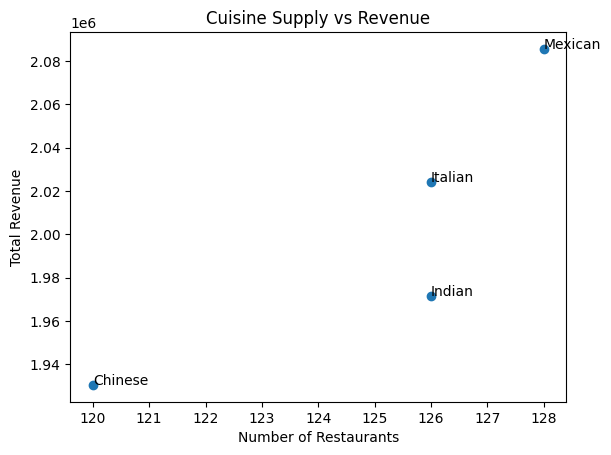

In [29]:
plt.scatter(cuisine_analysis["Restaurant_Count"],
            cuisine_analysis["Total_Revenue"])

plt.xlabel("Number of Restaurants")
plt.ylabel("Total Revenue")
plt.title("Cuisine Supply vs Revenue")

for cuisine in cuisine_analysis.index:
    plt.annotate(cuisine,
                 (cuisine_analysis.loc[cuisine,"Restaurant_Count"],
                  cuisine_analysis.loc[cuisine,"Total_Revenue"]))

plt.show()


In [30]:
total_orders = len(dataset)
gold_orders = len(dataset[dataset["membership"] == "Gold"])
gold_percentage = round((gold_orders / total_orders) * 100)

print("Percentage of orders placed by Gold members:", gold_percentage, "%")


Percentage of orders placed by Gold members: 50 %


In [31]:
restaurant_stats = dataset.groupby("restaurant_name").agg(
    Total_Orders=("order_id", "count"),
    Avg_Order_Value=("total_amount", "mean")
)
restaurant_stats.head()
filtered_restaurants = restaurant_stats[restaurant_stats["Total_Orders"] < 20]

filtered_restaurants.head()
result = filtered_restaurants.sort_values(
    "Avg_Order_Value",
    ascending=False
).head(1)

result



,Total_Orders,Avg_Order_Value
restaurant_name,,
Restaurant_294,13,1040.222308


In [32]:
combo_revenue = dataset.groupby(
    ["membership", "cuisine"]
)["total_amount"].sum()

combo_revenue
options = combo_revenue.loc[
    [("Gold", "Indian"),
     ("Gold", "Italian"),
     ("Regular", "Indian"),
     ("Regular", "Chinese")]
]

options
highest_combo = options.idxmax()
print("Highest Revenue Combination:", highest_combo)


Highest Revenue Combination: ('Gold', 'Italian')


In [33]:
dataset["order_date"] = pd.to_datetime(dataset["order_date"])
dataset["quarter"] = dataset["order_date"].dt.quarter
quarter_revenue = dataset.groupby("quarter")["total_amount"].sum()
highest_quarter = quarter_revenue.idxmax()
print("Quarter with Highest Revenue: Q" + str(highest_quarter))

Quarter with Highest Revenue: Q3


In [34]:
gold_orders

4987

In [35]:
hyderabad_revenue = dataset[
    dataset["city"] == "Hyderabad"
]["total_amount"].sum()

round(hyderabad_revenue)


1889367

In [36]:
distinct_users =dataset["user_id"].nunique()
distinct_users


2883

In [37]:
gold_avg = dataset[
    dataset["membership"] == "Gold"
]["total_amount"].mean()

round(gold_avg, 2)


797.15

In [38]:
high_rating_orders = len(
    dataset[dataset["rating"] >= 4.5]
)

high_rating_orders


3374

In [39]:
gold_city_revenue = dataset[
    dataset["membership"] == "Gold"
].groupby("city")["total_amount"].sum()

top_city = gold_city_revenue.idxmax()
top_city


'Chennai'

In [40]:
orders_in_top_city = len(
    dataset[
        (dataset["membership"] == "Gold") &
        (dataset["city"] == top_city)
    ]
)

orders_in_top_city


1337

In [41]:
len(dataset)


10000